# Test of the algorithm on a syntetic example with overlapping sets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pympc.geometry.polytope import Polytope
from pympc.geometry.convex_hull import PolytopeProjectionInnerApproximation

Create a synthetic feasible sets

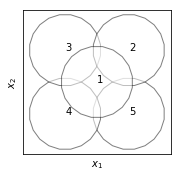

In [3]:
m = 20
A = np.array([[- np.cos(2. * k * np.pi / m), - np.sin(2. * k * np.pi / m)] for k in range(m)])
b = np.ones((m, 1))
d = .9
dx0 = np.array([[d],[-d]])
dx1 = np.array([[-d],[-d]])
dx2 = np.array([[-d],[d]])
dx3 = np.array([[d],[d]])
dx4 = np.array([[0.],[0.]])
dx_list = [dx0, dx1, dx2, dx3, dx4]
fig = plt.figure(figsize=(2.65,2.65))
P = []
for i, dx in enumerate(dx_list):
    p = Polytope(A, b + A.dot(dx))
    p.assemble()
    P.append(p)
    p.plot(facecolor='w', alpha=.5)
    plt.text(p.center[0,0], p.center[1,0], str(5-i))
plt.axis('equal')
plt.xticks([], [])
plt.yticks([], [])
#fig.savefig("sampling_1.pdf", bbox_inches='tight')
plt.show()

Apply the algorithm

In [4]:
H = []
for dx in dx_list:
    H.append(PolytopeProjectionInnerApproximation(A, b + A.dot(dx), [0,1]))

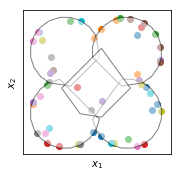

In [5]:
n_samples = 10000
x_max = np.ones((2,1))*2.
x_min = -x_max
n_included = 0
fig = plt.figure(figsize=(2.65,2.65))
for i in range(n_samples):
    x = np.random.rand(2, 1)
    x = np.multiply(x, (x_max - x_min)) + x_min
    rejected = False
    for h in H:
        if h.applies_to(x):
            rejected = True
    if not rejected:
        index = None
        for j, p in enumerate(reversed(P)):
            if p.applies_to(x):
                index = len(P) - j - 1
                break
        if index is not None:
            n_included += 1
            H[index].include_point(x)
            plt.scatter(x[0,0], x[1,0])
for h in H:
    p = Polytope(h.hull.A, h.hull.b)
    p.assemble()
    p.plot(facecolor='w', alpha=.5)
plt.xticks([], [])
plt.yticks([], [])
plt.axis('equal')
#fig.savefig("sampling_2.pdf", bbox_inches='tight')
plt.show()

In [6]:
print n_included

51
